In [8]:
%matplotlib inline

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_ind

In [10]:
workdir = "D://Biomarker_discovery//miR_Feature_selection//20210416_data_arrangement//Data"
df_genomic = pd.read_csv(workdir + "//200617_95_samples_miRNA_HC_vs_T2DM_RPM.csv"
                    , index_col = ["id"])
y = df_genomic["Class"] #Class
#X_DN = df_e1.drop(["Class", 'hsa-let-7b-5p', 'hsa-miR-23b-3p', 'hsa-let-7c-5p', 'hsa-miR-30a-3p', 'hsa-miR-200c-3p'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-1290'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-642a-5p', 'hsa-miR-1343-3p', 'hsa-miR-642a-3p', 'hsa-miR-99b-3p', 'hsa-miR-671-3p', 'hsa-miR-3144-5p', 'hsa-miR-320c', 'hsa-miR-150-5p'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-642a-5p', 'hsa-miR-642a-3p', 'hsa-miR-99b-3p', 'hsa-miR-891a-5p', 'hsa-miR-320c', 'hsa-miR-150-5p'], axis = 1) #Rest dataseet
df_genomic = df_genomic.drop(["Class"], axis = 1) #Rest dataseet
# split data train 70 % and test 30 %
#drop and rotate dataset
df_genomic = df_genomic.T[(df_genomic != 0).any()].T

_number_of_samples = len(df_genomic)
_number_of_items = len(df_genomic.columns.to_list())


In [11]:
len(df_genomic)

95

In [12]:

# # encode labels column to numbers
# le = LabelEncoder()
# #get label data by index and Encode items into 0 and 1
# le.fit(df_genomic.iloc[:, _labels.index(_target_label)])
# y = le.transform(df_genomic.iloc[:, _labels.index(_target_label)])
#get data excluding labels
X = df_genomic.iloc[:,]

#Min-Max normalization
# X = (X - X.min())/(X.max()-X.min())

# z-normalization
X = (X - X.mean())/X.std()
# X = log2(X+1)
#X.to_csv('miR.txt', sep='\t', header=True)

In [13]:
X.head()

,hsa-let-7a-2-3p,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,...,hsa-miR-95-3p,hsa-miR-95-5p,hsa-miR-9-5p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-98-5p,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-3p,hsa-miR-99b-5p
id,,,,,,,,,,,,,,,,,,,,,
SRR5034616,-0.124409,-0.972999,-1.590240,-0.710602,-1.668209,-0.190524,-1.497317,1.170055,-1.031390,-0.137931,...,-1.160351,0.327174,-1.113343,0.151506,1.374364,-1.361685,-0.148347,-0.718263,-0.421982,-0.804055
SRR5034617,-0.124409,-1.288310,-1.441082,-1.302135,-0.593264,-0.190524,-1.326951,0.243565,-0.841558,-0.256088,...,-1.160176,-0.679285,-1.087991,4.216716,-0.003670,-1.305469,-0.537258,-0.887539,-0.777453,-0.933970
SRR5034618,2.205339,-0.217445,-0.695676,-0.272238,1.210303,1.428110,2.183240,2.940800,1.919994,4.763839,...,-1.133289,-0.699102,-1.064693,0.495846,4.056442,-0.969239,0.333605,-0.859287,2.915960,-0.245828
SRR5034619,-0.124409,-0.623344,-1.477429,-0.146208,-1.488470,-0.190524,-1.337813,1.409313,-0.493901,0.230624,...,-0.957682,-0.699102,-1.026619,0.229754,2.023614,-1.318627,-0.342462,-0.679214,-0.634527,-0.864437
SRR5034620,-0.124409,-1.281504,-1.652755,-0.890091,-2.004037,-0.190524,-1.659201,0.533103,-1.618289,-0.264466,...,-1.181940,-0.699102,-1.104137,0.100825,0.301271,-1.412548,-0.269654,-0.844888,-0.929399,-1.009091


In [14]:
# 3개 miRNA DEG 양상 출력
data = pd.read_csv(workdir + "//200617_95_samples_miRNA_HC_vs_T2DM_RPM.csv"
                    , index_col = ["id"])

In [15]:
# subplot을 만들고
# 각각의 DE 결과를 창에 입력
# 각 DE plot의 부제목은 Settings # (GA) or Settings # (Traditional methods)
# supplementary figure 에 사용될 그림

miRNA_list = {"Setting 1":[['hsa-miR-29b-1-5p', 'hsa-miR-324-3p', 'hsa-miR-7849-3p']],
            "Setting 2":[['hsa-miR-125b-5p', 'hsa-miR-140-5p', 'hsa-miR-330-3p']],
            "Setting 3":[['hsa-miR-23a-5p', 'hsa-miR-29b-1-5p', 'hsa-miR-324-3p']],
            "Setting 1":[['hsa-miR-125b-2-3p', 'hsa-miR-29b-1-5p', 'hsa-miR-6738-3p']],
            "Setting 2":[['hsa-miR-29b-1-5p', 'hsa-miR-494-3p', 'hsa-miR-668-3p']],
            "Setting 3":[['hsa-miR-1307-3p', 'hsa-miR-222-5p', 'hsa-miR-671-5p']],
            "Setting 4":[['hsa-let-7b-5p', 'hsa-miR-29b-1-5p', 'hsa-miR-494-3p']],
            "Setting 5":[['hsa-let-7b-5p', 'hsa-miR-125b-5p', 'hsa-miR-7-5p']],
            "Setting 6":[['hsa-let-7b-5p', 'hsa-miR-7-5p', 'hsa-miR-92b-3p']],
            "Setting 7":[['hsa-miR-1307-3p', 'hsa-miR-6820-5p', 'hsa-miR-29b-2-5p']],
            "Setting 8&9":[['hsa-miR-181a-5p', 'hsa-miR-22-3p', 'hsa-miR-92a-3p']]}




In [16]:
# https://www.delftstack.com/ko/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

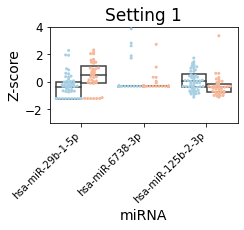

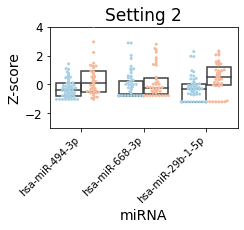

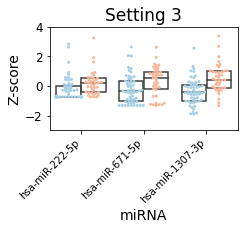

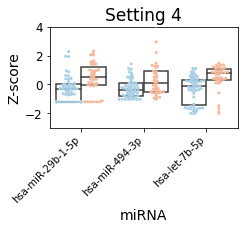

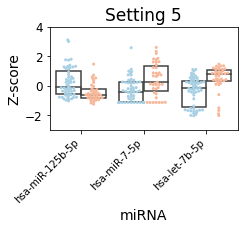

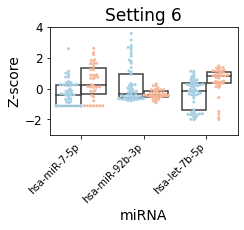

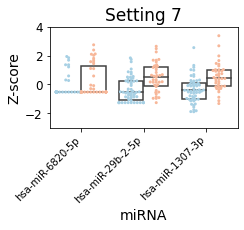

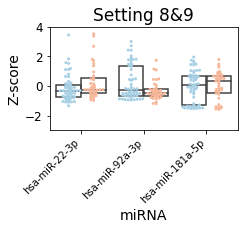

In [17]:
for title, i in miRNA_list.items():
    count = 1
    for lst in i:            
        box_df = X[lst].copy()
        y = data['Class']
        box_df = pd.concat([box_df,y], axis=1)
        box_df = pd.melt(box_df, 'Class', var_name='feature', value_name='value')
        for x in box_df.index:
            if box_df.loc[x,"Class"] == 1:
                box_df.loc[x,"Class"] = "T2DM"
            elif box_df.loc[x,"Class"] == 0:
                box_df.loc[x,"Class"] = "HC"
        box_df = box_df.sort_values(by="Class")
        
        vplot, ax3 = plt.subplots(figsize=(3.5,3.3))    
        vplot = sns.swarmplot(data=box_df, x='feature', y='value', hue='Class', color = ".25", size=3, palette='RdBu_r', dodge=True)
        # plot boxplot
        sns.boxplot(data=box_df, x="feature", y="value", hue='Class', 
                    showcaps=False,             # 박스 상단 가로라인 보이지 않기
                    whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
                    showfliers=False,           # 박스 범위 벗어난 아웃라이어 표시하지 않기
                    boxprops={'facecolor':'None'}, # 박스 색상 지우기
                )
        vplot.legend_.remove()
        vplot = vplot.get_figure()
        ax3.set_title(str(title),fontsize=17)
        ax3.set_ylim([-3, 4])
        plt.yticks(fontsize=12)
        plt.xticks(fontsize=10)
        vplot.autofmt_xdate(rotation=45)
        ax3.set_xlabel('miRNA',fontsize=14)
        ax3.set_ylabel('Z-score',fontsize=14)
        vplot.tight_layout()
        resultdir = "D://Biomarker_discovery//miR_Feature_selection//Figure//Raw//Fig3_DEG//RawFigure"
#         vplot.show()
        vplot.savefig(resultdir + "//Fig3_%s_%d.png" % (title, count), dpi=300)
        count += 1